In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data 

In [230]:
#loading read dataset
df = pd.read_csv("tested.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
df.shape

(418, 12)

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
df.duplicated().sum()

0

# EDA of Dataset

In [20]:
#groupby dataset Pclass and Survived
df[["Pclass","Survived"]].groupby(['Pclass'] , as_index=False).mean().sort_values(by='Survived', ascending =False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


In [21]:
df[["Sex","Survived"]].groupby(['Sex'] , as_index=False).mean().sort_values(by='Survived', ascending =False)

,Sex,Survived
0,female,1.0
1,male,0.0


In [232]:
#groupby dataset SibSp and Survived
df[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending =False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


In [25]:
df[["Parch","Survived"]].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending =False)

,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


In [28]:
df["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

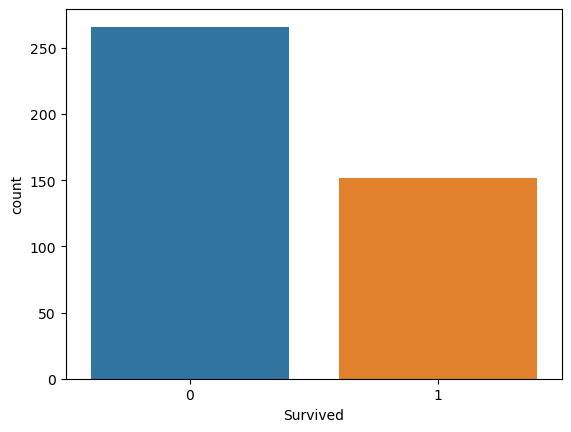

In [37]:
sns.countplot(df['Survived'])

<AxesSubplot:ylabel='Survived'>

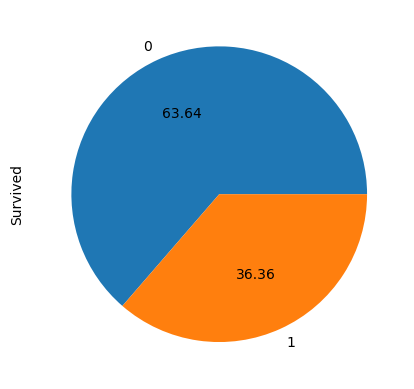

In [41]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

In [42]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

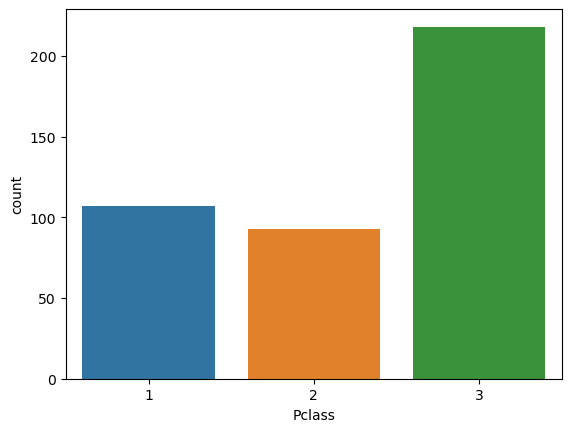

In [45]:
sns.countplot(df['Pclass'])

<AxesSubplot:ylabel='Pclass'>

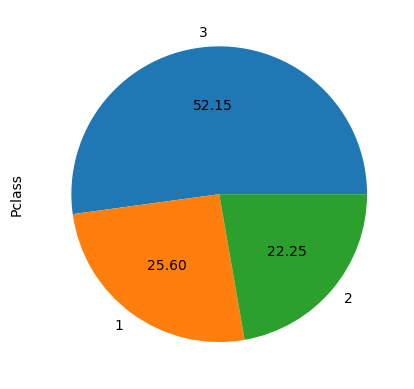

In [47]:
df["Pclass"].value_counts().plot(kind='pie',autopct='%.2f')

In [48]:
df["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

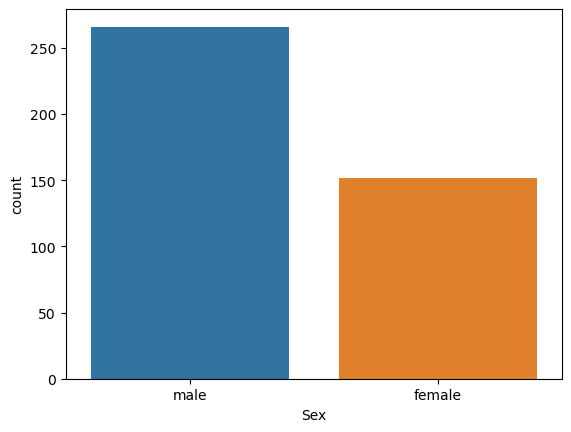

In [51]:
sns.countplot(df["Sex"])

<AxesSubplot:ylabel='Sex'>

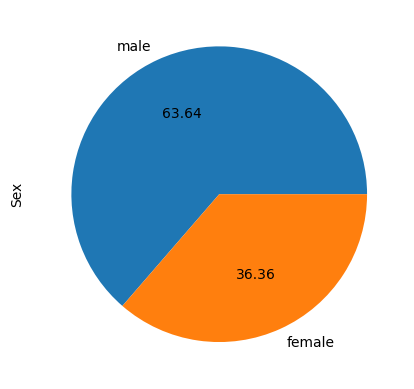

In [52]:
df["Sex"].value_counts().plot(kind='pie',autopct='%.2f')

In [54]:
df["Parch"].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

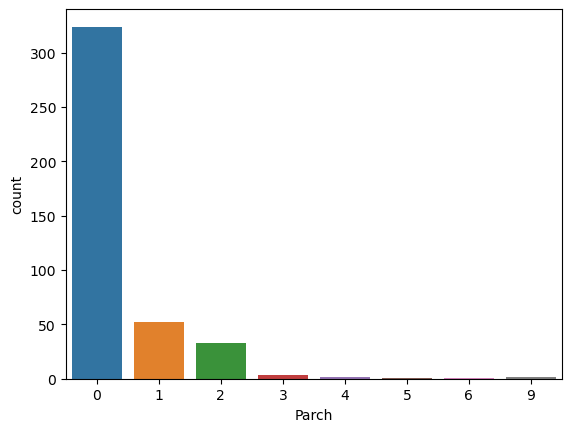

In [55]:
sns.countplot(df['Parch'])

<AxesSubplot:ylabel='Parch'>

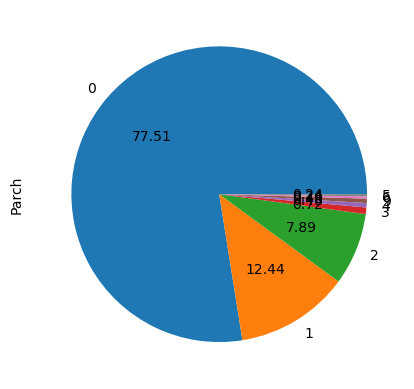

In [62]:
df["Parch"].value_counts().plot(kind='pie', autopct='%.2f')

In [63]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

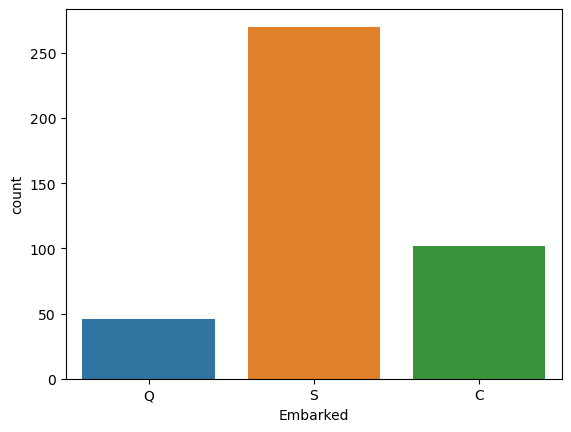

In [65]:
sns.countplot(df["Embarked"])

<AxesSubplot:ylabel='Embarked'>

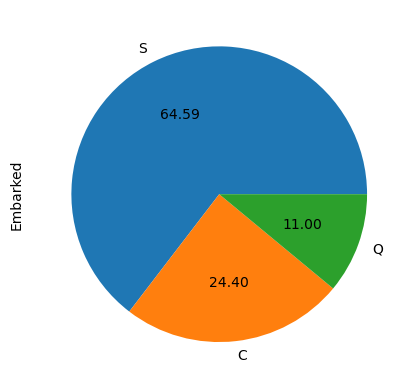

In [66]:
#pie plot use for Embarked
df["Embarked"].value_counts().plot(kind='pie', autopct='%.2f')

<AxesSubplot:xlabel='Age', ylabel='Count'>

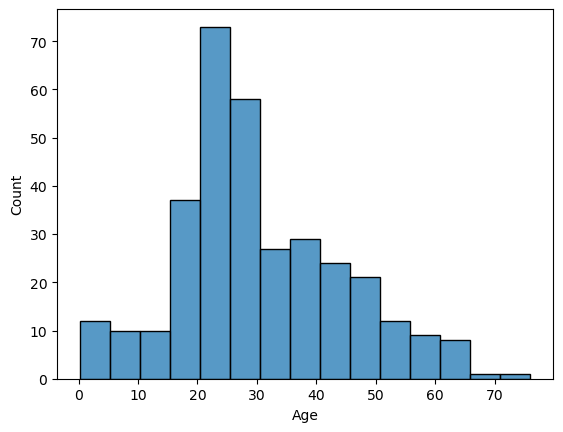

In [68]:
sns.histplot(df["Age"])

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

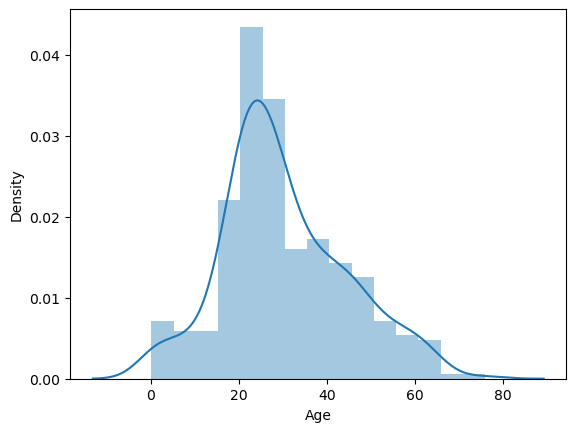

In [70]:
sns.distplot(df['Age'])

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

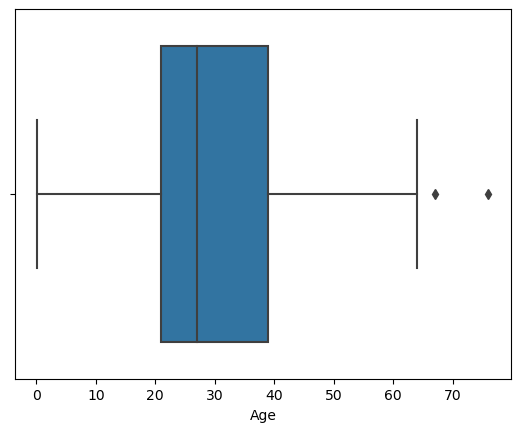

In [72]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

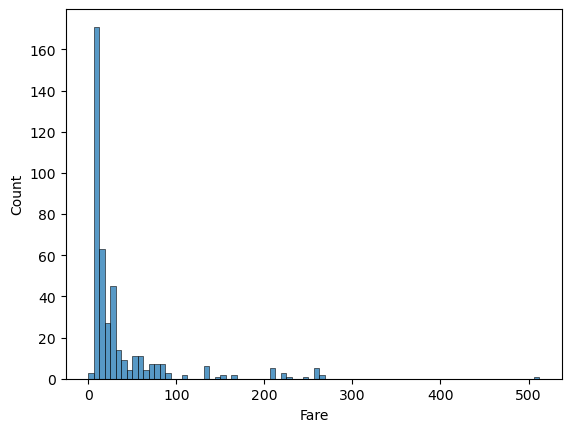

In [73]:
sns.histplot(df['Fare'])

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

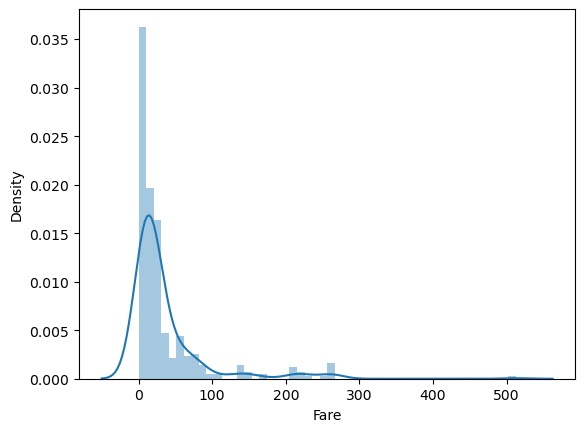

In [74]:
sns.distplot(df['Fare'])

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

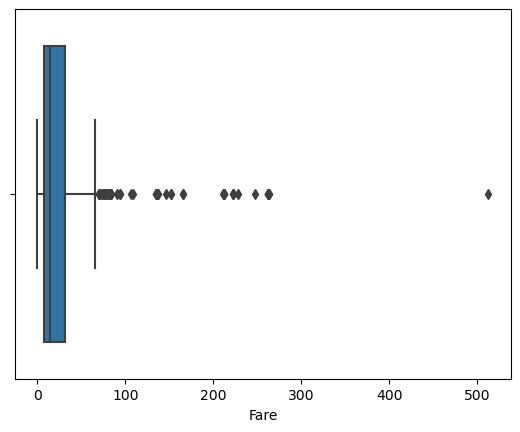

In [75]:
sns.boxplot(df['Fare'])

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

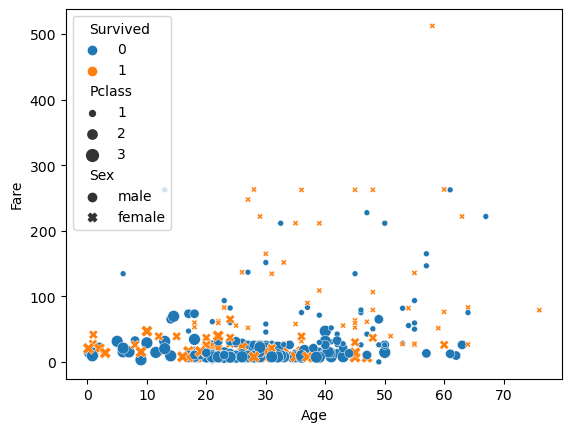

In [79]:
sns.scatterplot(df['Age'], df['Fare'],hue=df['Survived'],style=df['Sex'],size=df['Pclass'])

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Sex'>

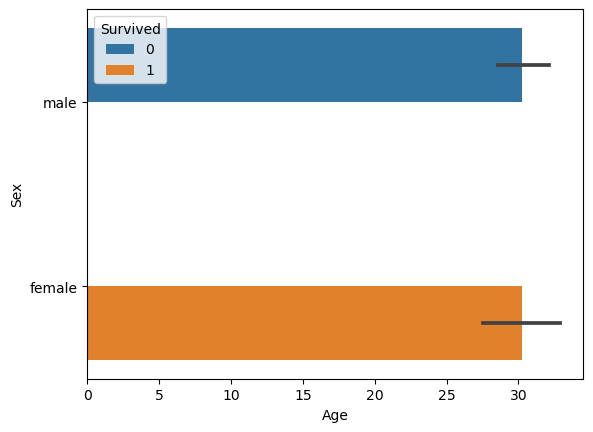

In [80]:
sns.barplot(df['Age'],df['Sex'],hue=df['Survived'])

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

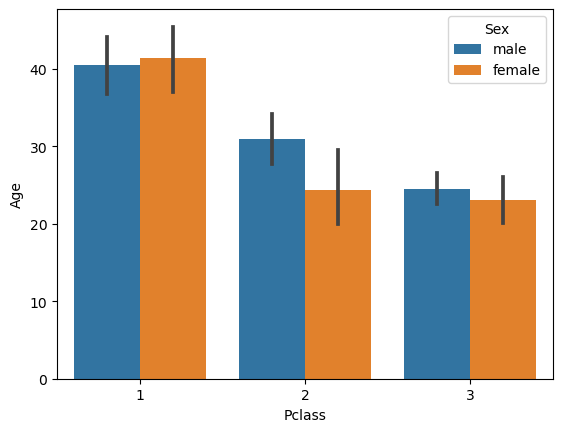

In [81]:
sns.barplot(df['Pclass'] , df['Age'] , hue=df['Sex'])

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

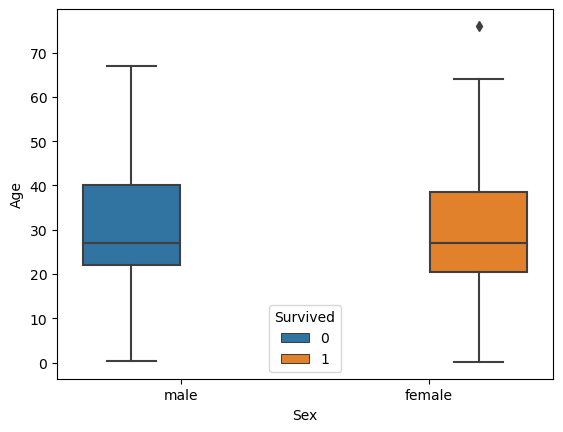

In [82]:
sns.boxplot(df['Sex'] , df['Age'] ,  hue=df['Survived'])

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

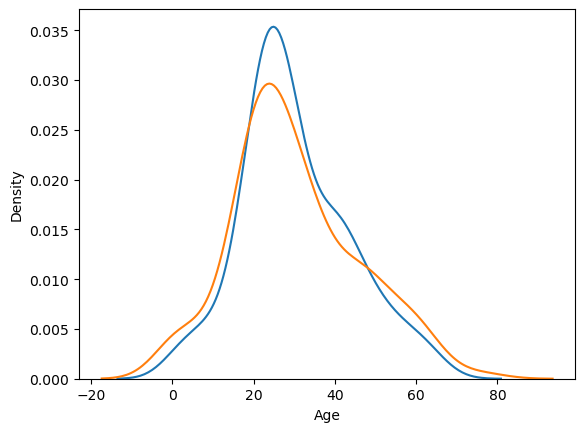

In [87]:
sns.distplot(df[df['Survived']==0]['Age'],hist=False)
sns.distplot(df[df['Survived']==1]['Age'],hist=False)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

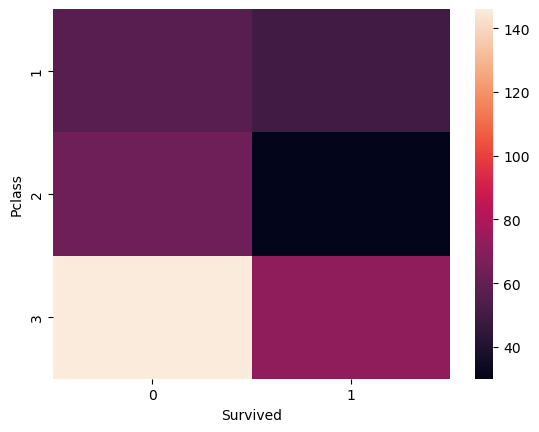

In [88]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

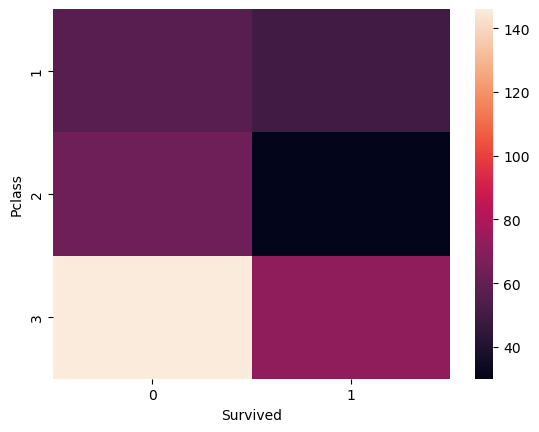

In [89]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

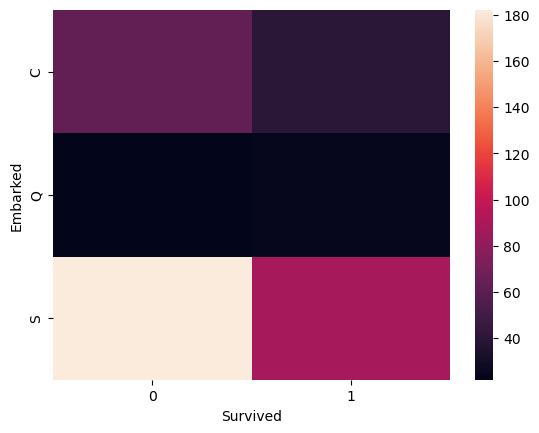

In [90]:
sns.heatmap(pd.crosstab(df['Embarked'],df['Survived']))

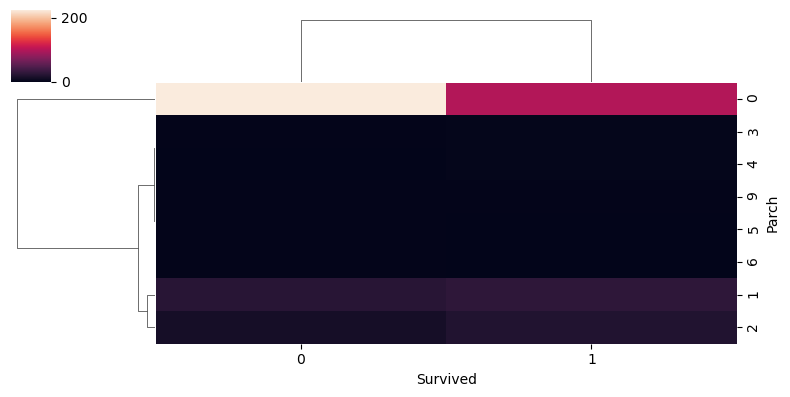

In [95]:
sns.clustermap(pd.crosstab(df['Parch'],df['Survived']),figsize=(8, 4))

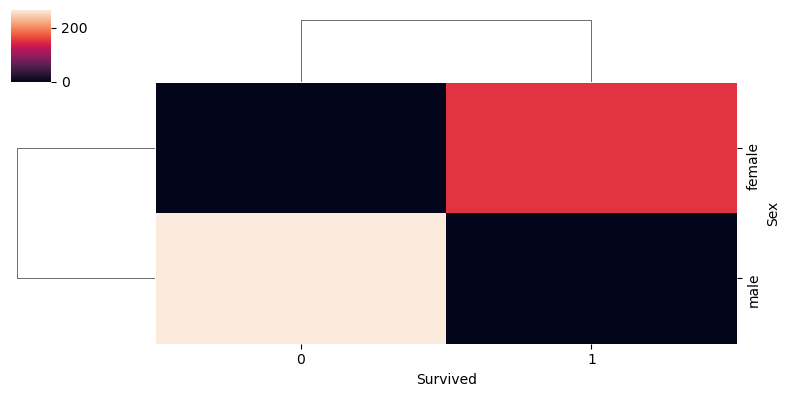

In [96]:
sns.clustermap(pd.crosstab(df['Sex'],df['Survived']),figsize=(8, 4))

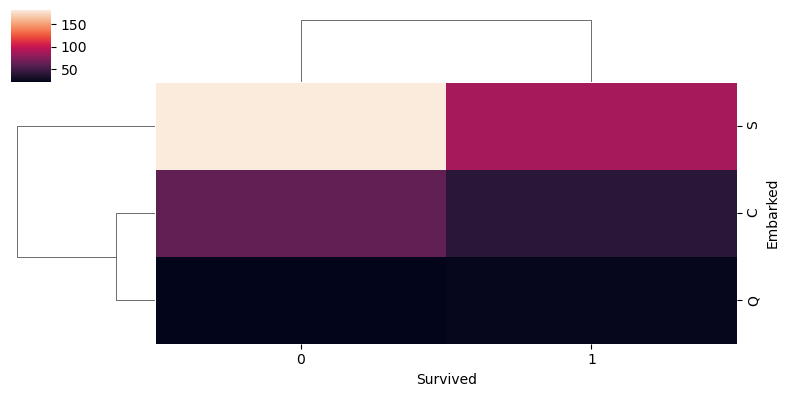

In [97]:
sns.clustermap(pd.crosstab(df['Embarked'],df['Survived']),figsize=(8, 4))

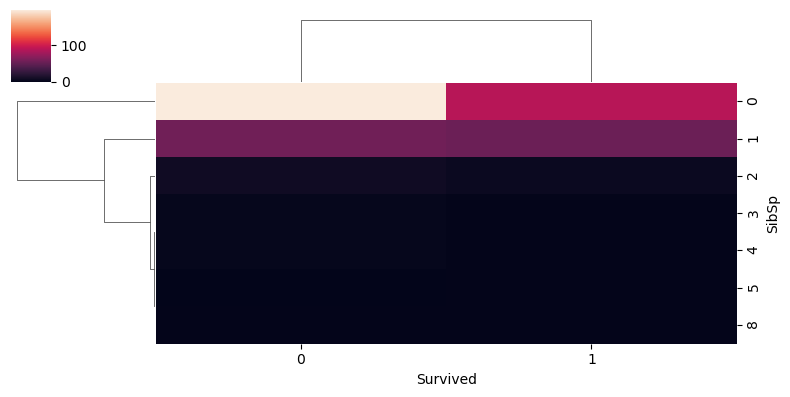

In [98]:
sns.clustermap(pd.crosstab(df['SibSp'],df['Survived']),figsize=(8, 4))

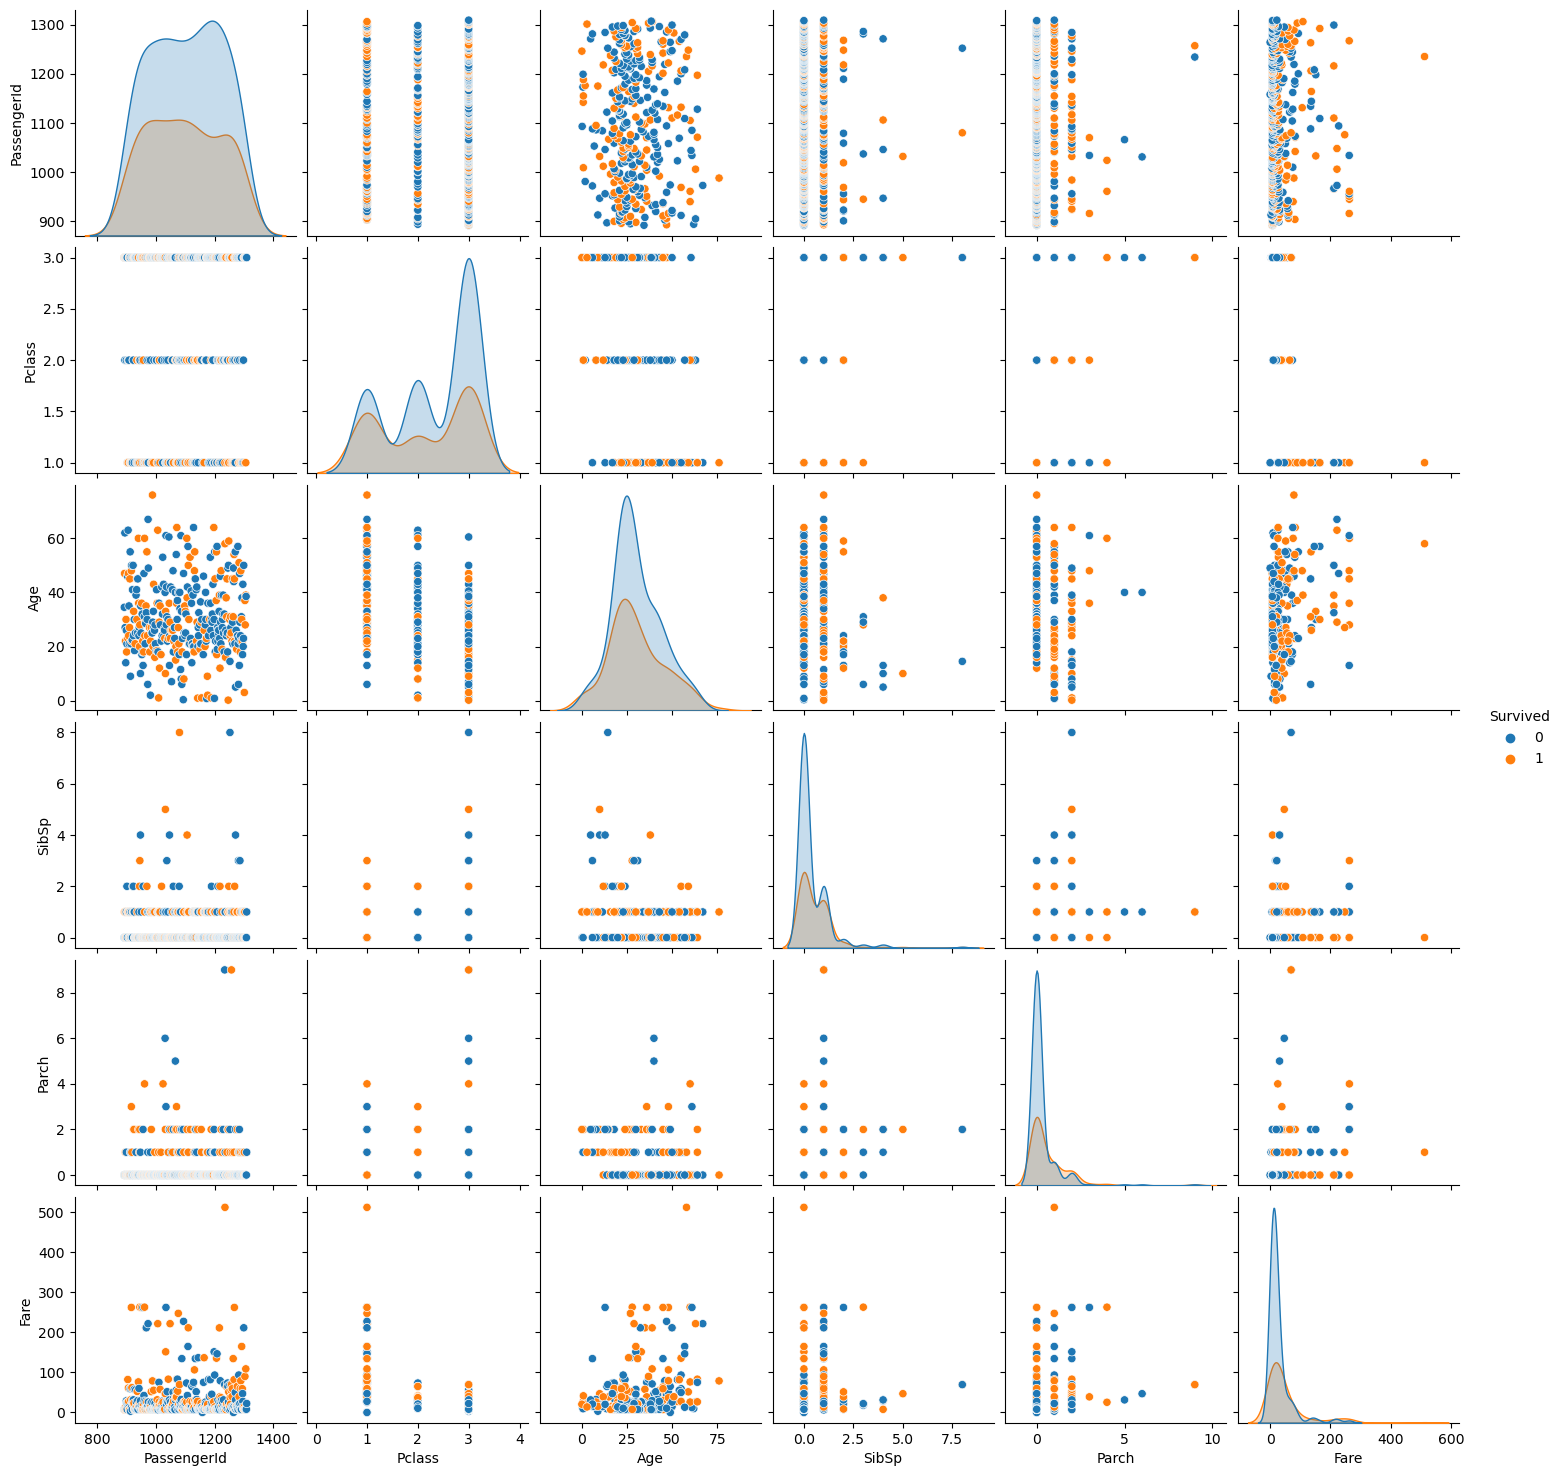

In [99]:
sns.pairplot(df,hue='Survived')

# Data Processing 

In [101]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [102]:
df = df.drop(columns='Cabin',axis=1)

In [103]:
# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [106]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [109]:
# replacing the missing values in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace=True)

In [111]:
print(df['Embarked'].mode()[0])

S


In [112]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [113]:
df = df.dropna()

In [114]:
 df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [116]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

C:\Users\sande\AppData\Local\Temp\ipykernel_16820\2058086687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    int64  
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 39.1+ KB


C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

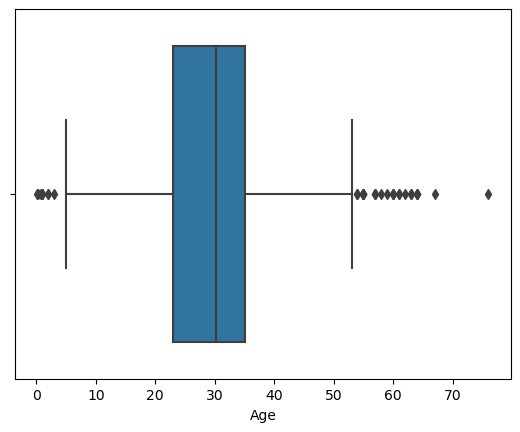

In [118]:
#check outlier 
sns.boxplot(df['Age'])

In [121]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)
print(percentile25)
print(percentile75)

23.0
35.0


In [123]:
percentile_25 = df['Fare'].quantile(0.25)
percentile_75 = df['Fare'].quantile(0.75)
print(percentile_25)
print(percentile_75)

7.8958
31.5


In [127]:
iqr = percentile75 - percentile25
iqr1 = percentile_75 - percentile_25
iqr

12.0

In [126]:
iqr1

23.6042

In [128]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_limit1 = percentile_75 + 1.5 * iqr1
lower_limit1 = percentile_25 - 1.5 * iqr1

In [129]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
print("Upper limit",upper_limit1)
print("Lower limit",lower_limit1)

Upper limit 53.0
Lower limit 5.0
Upper limit 66.9063
Lower limit -27.5105


In [135]:
new_df_cap = df.copy()

new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Age'] < lower_limit,
        lower_limit,
        new_df_cap['Age']
    )
)

new_df_cap['Fare'] = np.where(
    new_df_cap['Fare'] > upper_limit1,
    upper_limit1,
    np.where(
        new_df_cap['Fare'] < lower_limit1,
        lower_limit1,
        new_df_cap['Fare']
    )
)

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

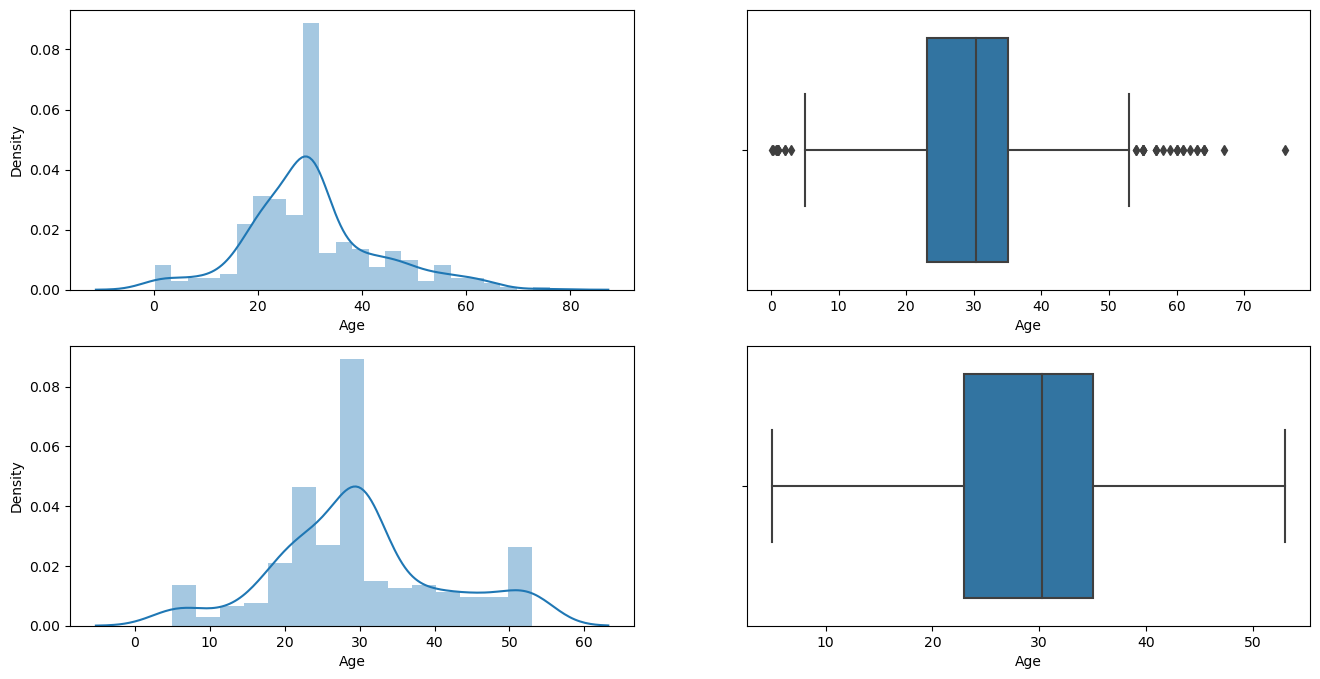

In [147]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Age'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Age'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Age'])

plt.show()

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

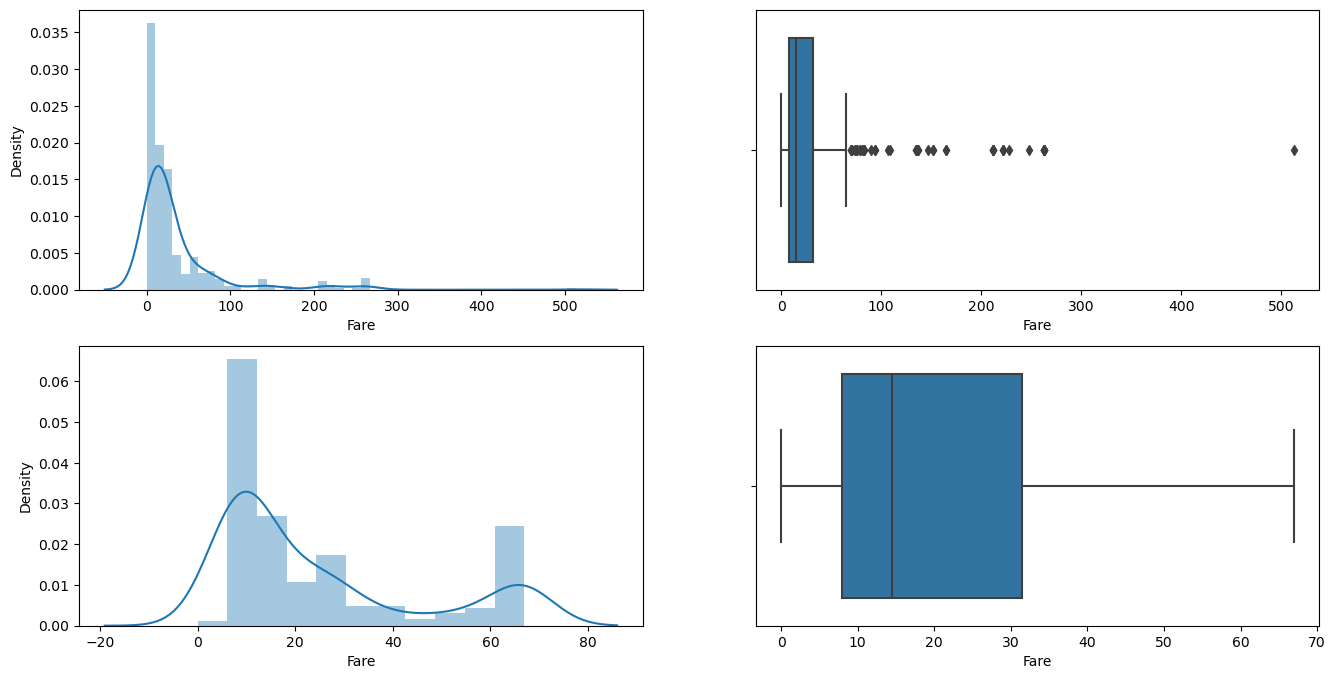

In [146]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Fare'])

plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Fare'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Fare'])

plt.show()

In [207]:
X = df.drop(columns= ["PassengerId" , "Name" , "Ticket" , "Survived"], axis=1)
y=df["Survived"]

In [208]:
print(X)
print(y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[417 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [210]:
print(X.shape, X_train.shape , X_test.shape)

(417, 7) (333, 7) (84, 7)


In [211]:
model = LogisticRegression()

In [212]:
model.fit(X_train, y_train)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [213]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [214]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [216]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [219]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

In [220]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


In [221]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [222]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [223]:
# accuracy score on the traing data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [224]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [227]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [228]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0
